In [1]:
import pystan
%matplotlib inline
%precision 4
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] <- mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

%time model = pystan.StanModel(model_code=schools_code)

%time fit = model.sampling(data=schools_dat, iter=10000, chains=4, n_jobs=4)
print(fit)

CPU times: user 983 ms, sys: 20.3 ms, total: 1 s
Wall time: 18 s


/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/multiprocessing/reduc

CPU times: user 28.7 ms, sys: 20.8 ms, total: 49.4 ms
Wall time: 5.23 s
Inference for Stan model: anon_model_95013624776d537c3cd7cd4d641c30e0.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.94    0.04   5.16   -2.1   4.62   7.86  11.17  18.24  20000    1.0
tau        6.62    0.04   5.54   0.27   2.57   5.33   9.18  20.36  20000    1.0
eta[0]     0.39  6.7e-3   0.95  -1.54  -0.23   0.42   1.03   2.18  20000    1.0
eta[1]   8.1e-3  6.1e-3   0.86  -1.69  -0.55 5.9e-3   0.57   1.73  20000    1.0
eta[2]     -0.2  6.6e-3   0.93  -2.01  -0.84  -0.21   0.41   1.65  20000    1.0
eta[3]    -0.04  6.2e-3   0.87  -1.77   -0.6  -0.03   0.54   1.68  20000    1.0
eta[4]    -0.37  6.2e-3   0.88  -2.05  -0.95  -0.37    0.2   1.43  20000    1.0
eta[5]    -0.23  6.4e-3    0.9  -1.97  -0.83  -0.23   0.36   1.58  20000    1.0
eta[6]     0.35  

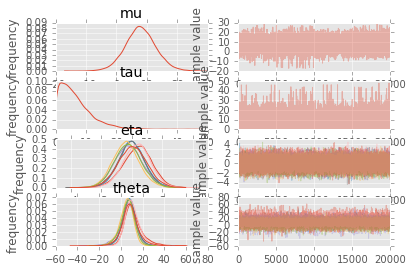

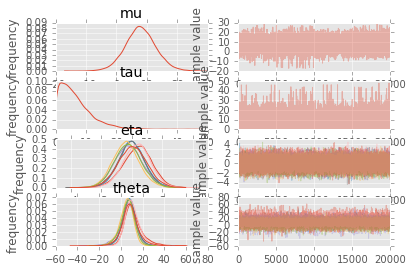

In [3]:
fit.plot()

In [4]:
seven_scientists_code="""
data {
    int<lower=0> n; // number of scientists
    real sample[n]; // measurements
}
parameters {
    real mu;
    real<lower=0> sigma[n];
}
model {
    for (i in 1:n)
        sigma[i] ~ uniform(0.1, 40);
    mu ~ normal(0, 30);
    for (i in 1:n)
        sample[i] ~ normal(mu, sigma[i]);
}
"""

%time scientists_model = pystan.StanModel(model_code=seven_scientists_code)

CPU times: user 958 ms, sys: 12.8 ms, total: 971 ms
Wall time: 17.8 s


In [5]:
sample = [-27.020,3.570,8.191,9.898,9.603,9.945,10.056]
scientists_dat = {
    'n': len(sample),
    'sample': sample
}

niter = 20000

%time fit = scientists_model.sampling(data=scientists_dat, iter=niter, chains=4, n_jobs=4)
print(fit)

/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/multiprocessing/reduc

CPU times: user 41.6 ms, sys: 30.4 ms, total: 72 ms
Wall time: 15.6 s
Inference for Stan model: anon_model_ff40db9783b3500b13e071ecd00468cf.
4 chains, each with iter=20000; warmup=10000; thin=1; 
post-warmup draws per chain=10000, total post-warmup draws=40000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         8.89    0.01   2.44   2.56   8.26   9.52  10.03  12.44  40000   1.01
sigma[0]  28.98    0.03   6.95  15.14  23.66  29.57  34.86   39.6  40000    1.0
sigma[1]  16.21    0.05  10.46   2.19   7.32   13.8  24.16  38.06  40000    1.0
sigma[2]  11.02    0.05  10.38   0.38   2.76   7.09  17.04  36.55  40000    1.0
sigma[3]  10.41    0.05  10.72   0.22   1.82   6.18  16.16  36.92  40000    1.0
sigma[4]    9.9    0.05  10.29   0.25   1.85   5.75  15.09  36.11  40000    1.0
sigma[5]   10.5    0.05  10.71   0.21   1.88    6.3  16.34   36.6  40000   1.01
sigma[6]  10.66    0.05   10.7   0.21   2.03    6.5  16.89  36.73  40000   1.01
lp__      -1.93  

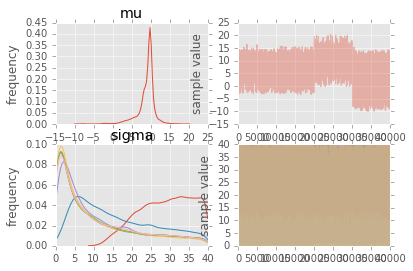

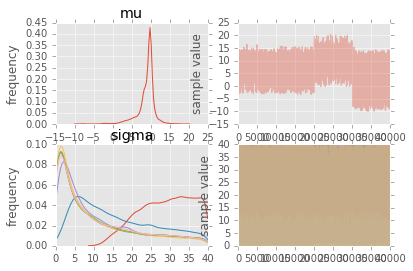

In [6]:
fit.plot()